# Production Planning
## Problem Definition
PLACASA, a supplier of plastic injection parts for the automobile sector, foresees the demand of an article for the following 4 months of 100, 140, 210 and 180 units, respectively. The firm can maintain only sufficient stock to meet the demand of each month or it can have excess stock to meet the demand of two successive months or more with a storage cost of 1.2€ per month and unit of excessive stock. 
PLACASA calculates that the production cost for the following months, is €15, €12, €10 and €14 per unit. A preparation cost of €200 is incurred every time a production order is placed. The firm wishes to develop a production plan that minimises the total costs of production orders, of production and of keeping an article in stock. Formulate and solve a shortest path model to find an optimum production plan.

## Solution
We are going to use [networkx] (https://networkx.github.io/) to draw the network and find the shortest path between two nodes. 
Each node in the graph is going to represent a production period (one month). Thus, there will be 5 nodes, for month 0 (current month) and the four following months. Edges (i,j) represent the decision to produce in month i all the demand up to month j. For instance, edge 01 means that we decide to manufacture in month 0 100 units, which is the demand in month 1, and 04 means that we decide to manufacture in month 0 100+140+210+180=650 units, which is the demand forecast for the forthcoming 4 months.
To calculate the costs, we need to apply the production cost $cp_i$, storage cost $cs$, and preparation costs $c_P$.

$c_{ij} = c_P+\sum_{k=i+1}^{j}d_k·(cp_i+(k-1)·cs)$

$c_{01} = 200 + \sum_{k=1}^{1}d_k·(cp_0+(k-1)·cs) = 200 + 100·(15+0·1.2) = 1500$

$c_{02}= 200 + \sum_{k=1}^{2}d_k·(cp_0+(k-1)·cs) = 200 + 100·(15+0·1.2) + 140·(15+1·1.2) = 3968$

...

$c_{24} = 200 + \sum_{k=3}^{4}d_k·(cp_2+(k-1)·cs) = 200 + 210·(10+0·1.2) + 180·(10+1·1.2) = 4316$

$c_{34} = 200 + \sum_{k=4}^{4}d_k·(cp_2+(k-1)·cs) = 200 + 180·(14+0·1.2) = 2720$



The following code shows the solution in Python.

In [1]:
import pandas as pd
import networkx as nx
from IPython.display import display, Markdown

# Create an empty directed graph structure: 
G = nx.DiGraph()

# Add edges and define two attributes, production and costs:
G.add_edges_from([(0,1, {'cost': 1700, 'production': 100}),
                  (0,2, {'cost': 3968, 'production': 240}),
                  (0,3, {'cost': 7622, 'production': 450}),                  
                  (0,4, {'cost': 10970, 'production': 630}),
                  (1,2, {'cost': 1880, 'production': 140}),
                  (1,3, {'cost': 4652, 'production': 350}),
                  (1,4, {'cost': 7028, 'production': 530}),
                  (2,3, {'cost': 2300, 'production': 210}),
                  (2,4, {'cost': 4316, 'production': 390}),
                  (3,4, {'cost': 2720, 'production': 180}),
                 ])

# Draw the directed graph
nx.draw_shell(G, with_labels=True)

#Calculate shortest path from 0 to 4, using the attribute cost as edge weight
shortest_path = nx.shortest_path(G, 0, 4, weight="cost")

# Calculatee the production per month, and the total cost using the shortest path solution and the cost attribute
total_cost = 0
production = {}
for i in range(len(shortest_path)-1):
    total_cost+=G[shortest_path[i]][shortest_path[i+1]]['cost']
    production[i]={'production': G[shortest_path[i]][shortest_path[i+1]]['production']}
    
#Print the solution
print("Total cost is: ", total_cost)
print("Shortest path is:", shortest_path)
print("Monthly production is: ", production)

edges_df = nx.to_pandas_edgelist(G);

production = pd.DataFrame.from_dict(production, orient='index')
display(edges_df)
display(production)


Total cost is:  7896
Shortest path is: [0, 1, 2, 4]
Monthly production is:  {0: {'production': 100}, 1: {'production': 140}, 2: {'production': 390}}


,source,target,cost,production
0,0,1,1700,100
1,0,2,3968,240
2,0,3,7622,450
3,0,4,10970,630
4,1,2,1880,140
5,1,3,4652,350
6,1,4,7028,530
7,2,3,2300,210
8,2,4,4316,390
9,3,4,2720,180


,production
0,100
1,140
2,390


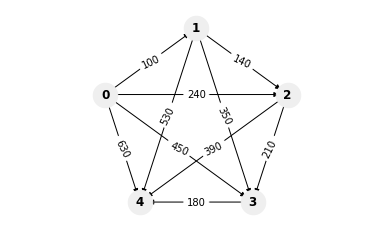

In [3]:
import matplotlib.pyplot as plt

# Draw the directed graph
pos = {0: (28.09, 0.62),
       1: (30, 2.01),
       2: (31.91, 0.62),
       3: (31.18, -1.63),
       4: (28.82, -1.63)
      }

nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_size=600, node_color='#efefef')
nx.draw_networkx_labels(G, pos, font_weight='bold' )
c_label = nx.get_edge_attributes(G, 'production')
nx.draw_networkx_edge_labels(G, pos, edge_labels=c_label)
plt.axis('equal')
plt.axis('off')
plt.show()

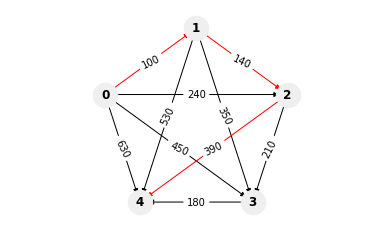

In [12]:
# Draw the directed graph with colored edges
pos = {0: (28.09, 0.62),
       1: (30, 2.01),
       2: (31.91, 0.62),
       3: (31.18, -1.63),
       4: (28.82, -1.63)
      }
red_edges = list(zip(shortest_path,shortest_path[1:]))
edge_col = ['red' if edge in red_edges else 'black' for edge in G.edges()]
nx.draw_networkx_edges(G, pos, edge_color= edge_col)
nx.draw_networkx_nodes(G, pos, node_size=600, node_color='#efefef')
nx.draw_networkx_labels(G, pos, font_weight='bold')
c_label = nx.get_edge_attributes(G, 'production')
nx.draw_networkx_edge_labels(G, pos, edge_labels=c_label)
plt.axis('equal')
plt.axis('off')
plt.show()